<a href="https://colab.research.google.com/github/madan-genai/NLP_-/blob/main/Bag_of_Words_model_in_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install nltk

In [20]:
import nltk
import re
nltk.download('punkt')
nltk.download('punkt_tab')
text = """Beans. I was trying to explain to somebody as we were flying in, that's corn.
         That's beans. And they were very impressed at my agricultural knowledge.
         Please give it up for Amaury once again for that outstanding introduction.
         I have a bunch of good friends here today, including somebody who I served with,
         who is one of the finest senators in the country, and we're lucky to have him,
         your Senator, Dick Durbin is here. I also noticed, by the way,
         former Governor Edgar here, who I haven't seen in a long time, and
         somehow he has not aged and I have. And it's great to see you, Governor.
         I want to thank President Killeen and everybody at the U of I System for
         making it possible for me to be here today. And I am deeply honored at the Paul
         Douglas Award that is being given to me. He is somebody who set the path for so
         much outstanding public service here in Illinois. Now, I want to start by
         addressing the elephant in the room. I know people are still wondering why
         I didn't speak at the commencement."""

dataset = nltk.sent_tokenize(text)
for i in range(len(dataset)):
  dataset[i] = dataset[i].lower()
  dataset[i] = re.sub(r'\W', ' ', dataset[i])
  dataset[i] = re.sub(r'\s+', ' ', dataset[i])

for i, sentence in enumerate(dataset):
  print(f"Sentence{i+1}:{sentence}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...


Sentence1:beans 
Sentence2:i was trying to explain to somebody as we were flying in that s corn 
Sentence3:that s beans 
Sentence4:and they were very impressed at my agricultural knowledge 
Sentence5:please give it up for amaury once again for that outstanding introduction 
Sentence6:i have a bunch of good friends here today including somebody who i served with who is one of the finest senators in the country and we re lucky to have him your senator dick durbin is here 
Sentence7:i also noticed by the way former governor edgar here who i haven t seen in a long time and somehow he has not aged and i have 
Sentence8:and it s great to see you governor 
Sentence9:i want to thank president killeen and everybody at the u of i system for making it possible for me to be here today 
Sentence10:and i am deeply honored at the paul douglas award that is being given to me 
Sentence11:he is somebody who set the path for so much outstanding public service here in illinois 
Sentence12:now i want to st

[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [24]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

word2count = {}

for data in dataset:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count:
            word2count[word] = 1
        else:
            word2count[word] += 1

stop_words = set(stopwords.words('english'))

filtered_word2count = {word: count for word, count in word2count.items() if word not in stop_words}

word_freq_df = pd.DataFrame(list(filtered_word2count.items()), columns=['Word', 'Frequency'])

word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

print(word_freq_df)

            Word  Frequency
3       somebody          3
0          beans          2
17         today          2
12   outstanding          2
41          want          2
..           ...        ...
67        people          1
68         still          1
69     wondering          1
70         speak          1
71  commencement          1

[72 rows x 2 columns]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Top 10 frequent words: ['i', 'the', 'to', 'and', 'in', 'for', 'here', 'that', 'at', 'who']


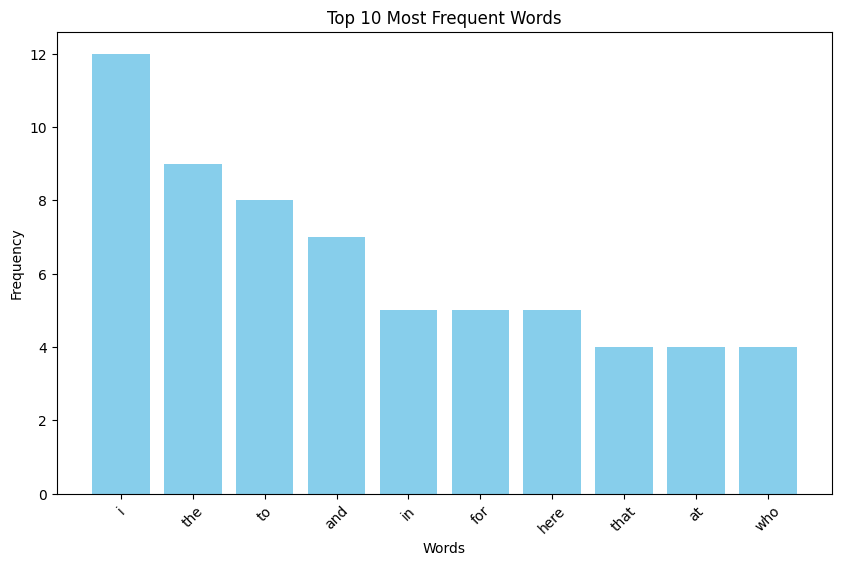

In [25]:
import heapq
import matplotlib.pyplot as plt

freq_words = heapq.nlargest(10, word2count, key=word2count.get)

print(f"Top 10 frequent words: {freq_words}")

top_words = sorted(word2count.items(), key=lambda x: x[1], reverse=True)[:10]
words, counts = zip(*top_words)

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45)
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

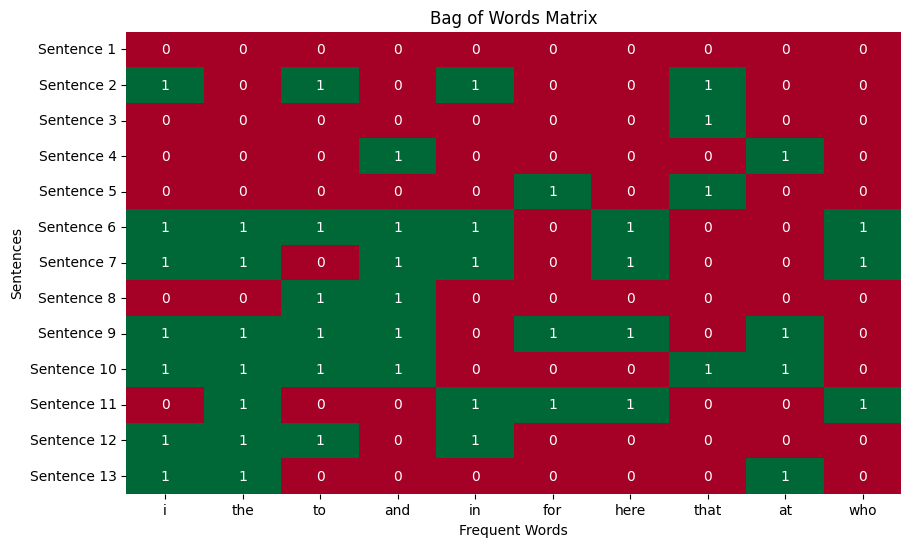

In [26]:
import numpy as np
import seaborn as sns

X = []

for data in dataset:
    vector = []
    for word in freq_words:
        if word in nltk.word_tokenize(data):
            vector.append(1)
        else:
            vector.append(0)
    X.append(vector)

X = np.asarray(X)

plt.figure(figsize=(10, 6))
sns.heatmap(X, cmap='RdYlGn', cbar=False, annot=True, fmt="d", xticklabels=freq_words, yticklabels=[f"Sentence {i+1}" for i in range(len(dataset))])

plt.title('Bag of Words Matrix')
plt.xlabel('Frequent Words')
plt.ylabel('Sentences')
plt.show()

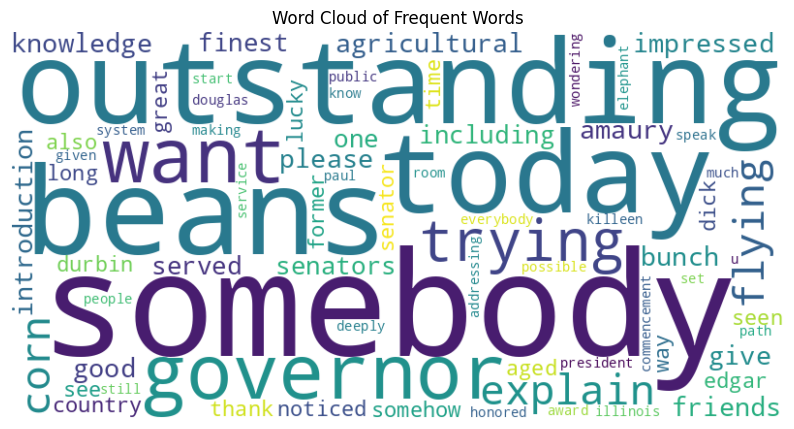

In [27]:
from wordcloud import WordCloud

word_cloud = WordCloud(width=800, height=400, background_color="white", min_font_size=10).generate_from_frequencies(filtered_word2count)

plt.figure(figsize=(10,6))
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Frequent Words")
plt.show()